<a href="https://colab.research.google.com/github/AriqF1/dataMining/blob/main/eksperimenTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
file_path = 'gym_tracking.csv'
data = pd.read_csv(file_path)
print(data.head())


   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

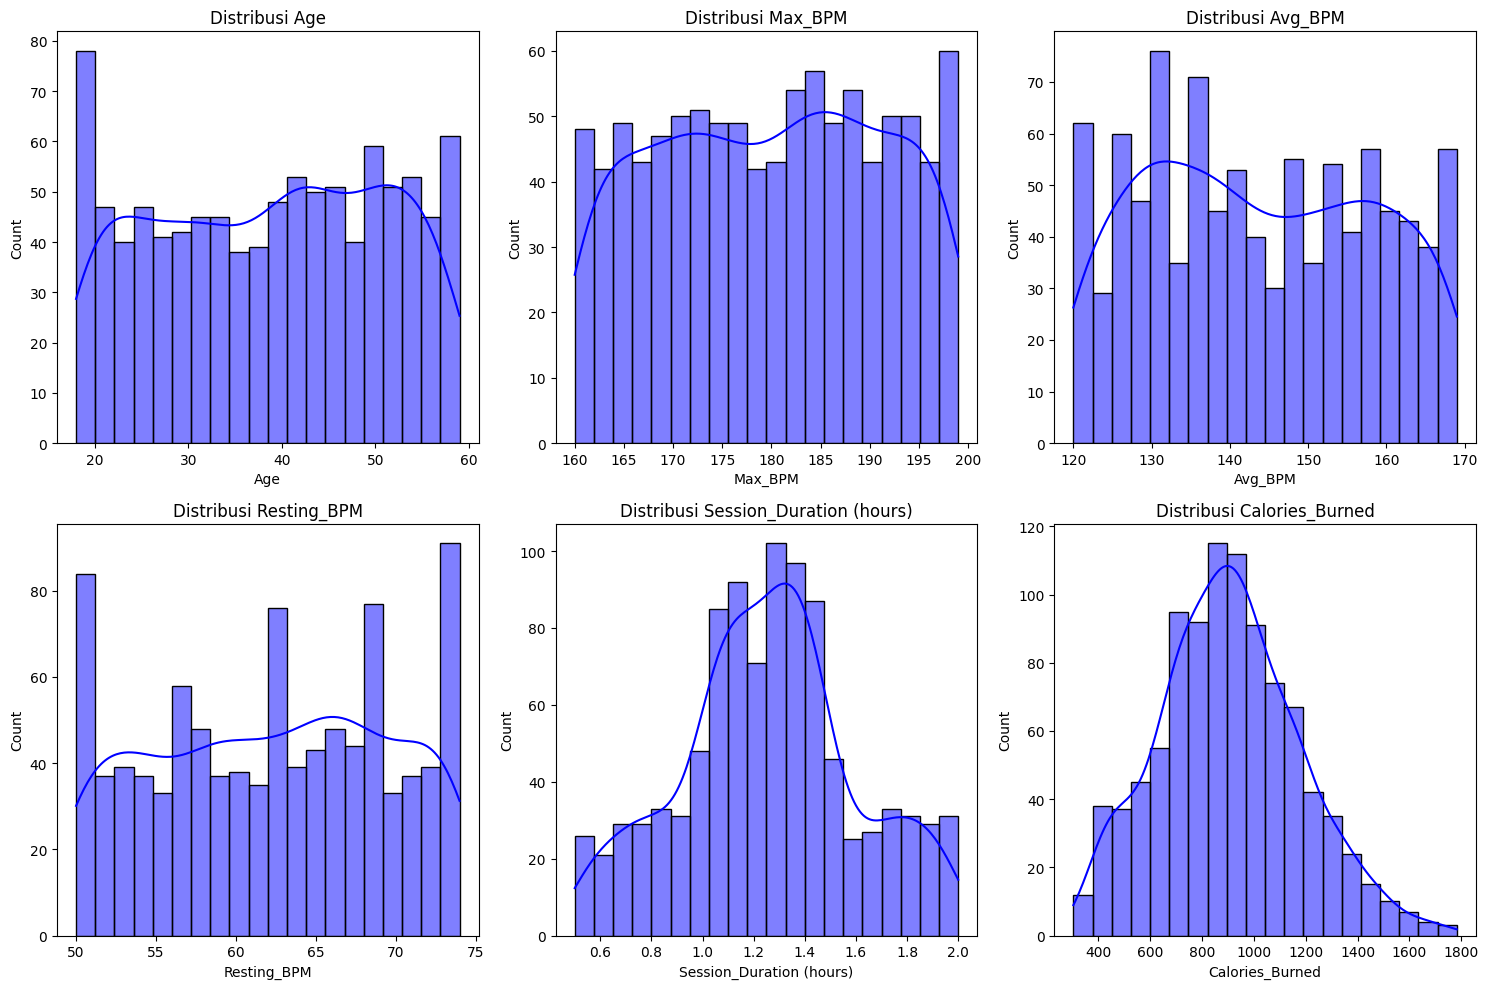

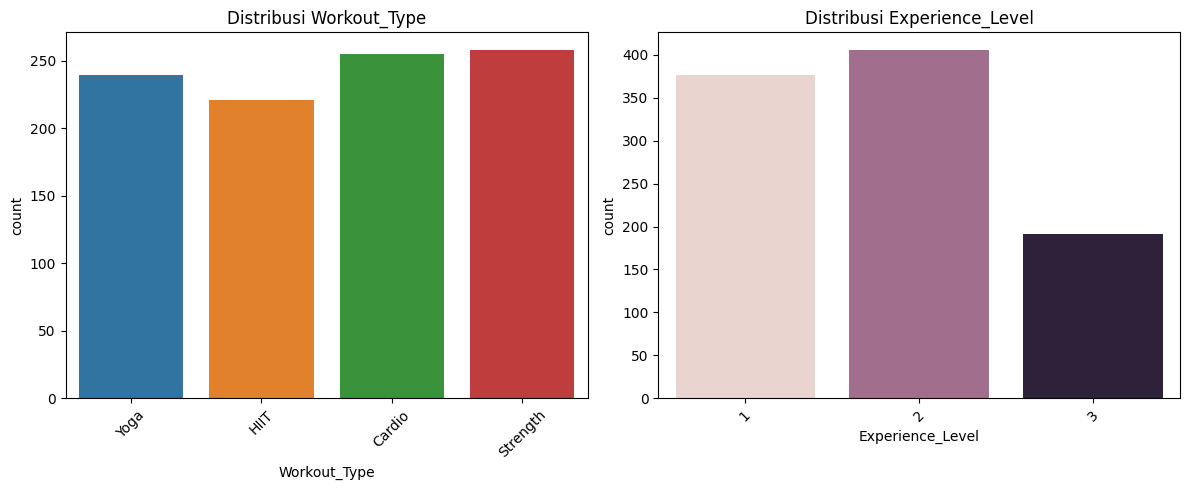

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# visualisasi distribusi
numeric_features = ['Age', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                    'Session_Duration (hours)', 'Calories_Burned']
categorical_features = ['Workout_Type', 'Experience_Level']

# fitur numerik
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=20, color='blue')
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

# fitur kategorical
plt.figure(figsize=(12, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=data, x=feature, hue=feature, dodge=False, legend=False)
    plt.title(f'Distribusi {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



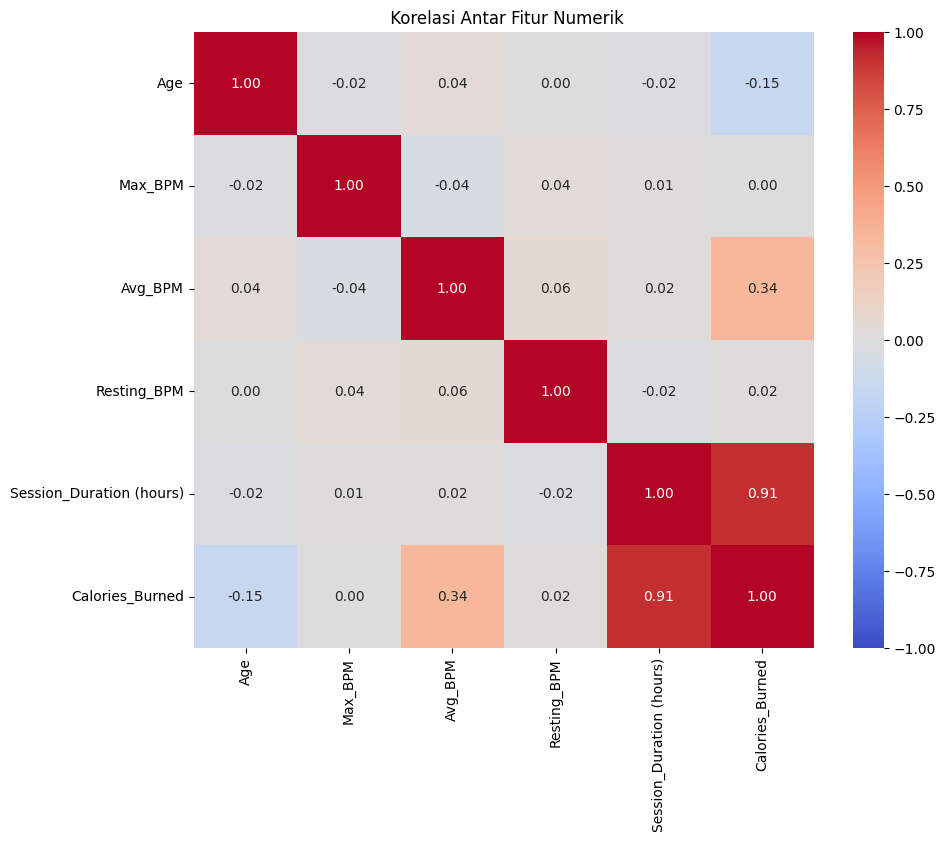

In [4]:
# Analisis korelasi antar fitur numerik
correlation_matrix = data[numeric_features].corr()
# heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title(' Korelasi Antar Fitur Numerik')
plt.show()


In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df = pd.DataFrame(data)

# Step 1: One-Hot Encoding untuk kolom kategorikal
one_hot_features = ['Gender', 'Workout_Type']
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop 'first' untuk menghindari multikolinearitas
one_hot_encoded = one_hot_encoder.fit_transform(df[one_hot_features])

# Mendapatkan nama kolom hasil One-Hot Encoding
one_hot_columns = one_hot_encoder.get_feature_names_out(one_hot_features)

# Membuat DataFrame hasil One-Hot Encoding
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns, index=df.index)

# Step 2: Label Encoding untuk kolom kategorikal lainnya
label_encode_feature = 'Experience_Level'
label_encoder = LabelEncoder()
df[label_encode_feature] = label_encoder.fit_transform(df[label_encode_feature])

# Step 3: Gabungkan hasil One-Hot Encoding dengan dataset utama
df_encoded = pd.concat([df.drop(columns=one_hot_features), one_hot_encoded_df], axis=1)

# Output hasil

print(df_encoded.head())
print("\nTipe Data:")
print(df_encoded.dtypes)


   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   
2   32         68.1        1.66      167      122           54   
3   25         53.2        1.70      190      164           56   
4   38         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69           1313.0            12.6   
1                      1.30            883.0            33.9   
2                      1.11            677.0            33.4   
3                      0.59            532.0            28.8   
4                      0.64            556.0            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 2   
1                    2.1                              4         

In [22]:
# Membuat fitur Training_intensity
df_encoded['Training_intensity'] = df_encoded['Calories_Burned'] / df_encoded['Session_Duration (hours)']

# Periksa hasilnya
print(df_encoded[['Session_Duration (hours)', 'Calories_Burned', 'Training_intensity']].head())


   Session_Duration (hours)  Calories_Burned  Training_intensity
0                      1.69           1313.0          776.923077
1                      1.30            883.0          679.230769
2                      1.11            677.0          609.909910
3                      0.59            532.0          901.694915
4                      0.64            556.0          868.750000


In [23]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = df_encoded.drop('Experience_Level', axis=1)  # Fitur
y = df_encoded['Experience_Level']  # Target

# Pembagian data (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 778 samples
Test set: 195 samples


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 88.21%


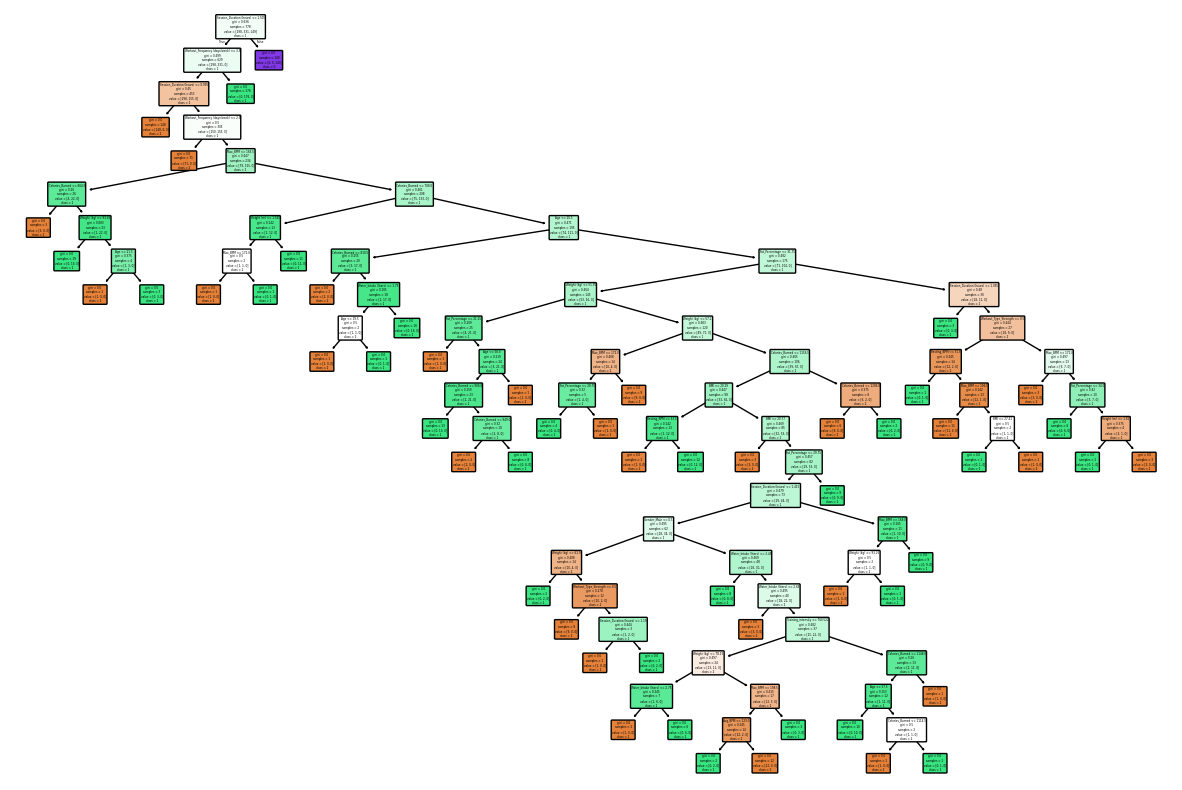

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualisasi decision tree
plt.figure(figsize=(15, 10))

class_names = [str(cls) for cls in y.unique()]  # Ambil kelas unik dari y

plot_tree(
    model,
    filled=True,
    feature_names=X.columns,
    class_names=class_names,
    rounded=True
)
plt.show()


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Tentukan grid hyperparameter untuk GridSearch
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10]
}
# Tentukan distribusi untuk RandomizedSearch
param_dist = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10]
}
# Membuat model DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Melatih model dengan GridSearch
grid_search.fit(X_train, y_train)

# Menampilkan hasil GridSearch
print("Best Hyperparameters from GridSearch: ", grid_search.best_params_)



Best Hyperparameters from GridSearch:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [28]:
# Menggunakan dari GridSearch
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Melakukan prediksi pada test set
y_pred = best_model.predict(X_test)

# Evaluasi model dengan akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Hyperparameters: {accuracy * 100:.2f}%")



Accuracy with Best Hyperparameters: 92.31%


In [29]:
from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[63 15  0]
 [ 0 75  0]
 [ 0  0 42]]


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 92.31%
Precision: 0.94
Recall: 0.92
F1-Score: 0.92


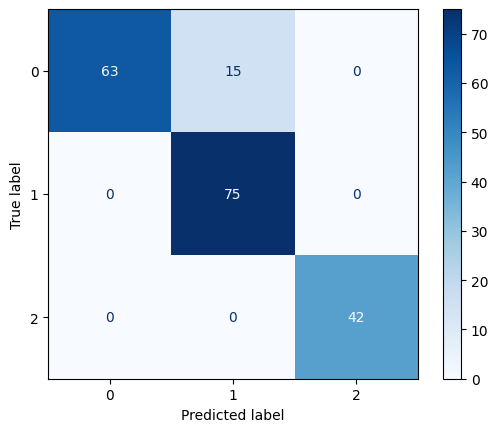

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a. Hyperparameter Tuning menggunakan GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 10]
}

# Inisialisasi Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Melatih GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Model dengan hyperparameter optimal
best_model = grid_search.best_estimator_

# b. Evaluasi Model
# Prediksi pada test set
y_pred = best_model.predict(X_test)

# Metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)

# c. Menampilkan hasil
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualisasi Confusion Matrix
disp.plot(cmap='Blues')
plt.show()


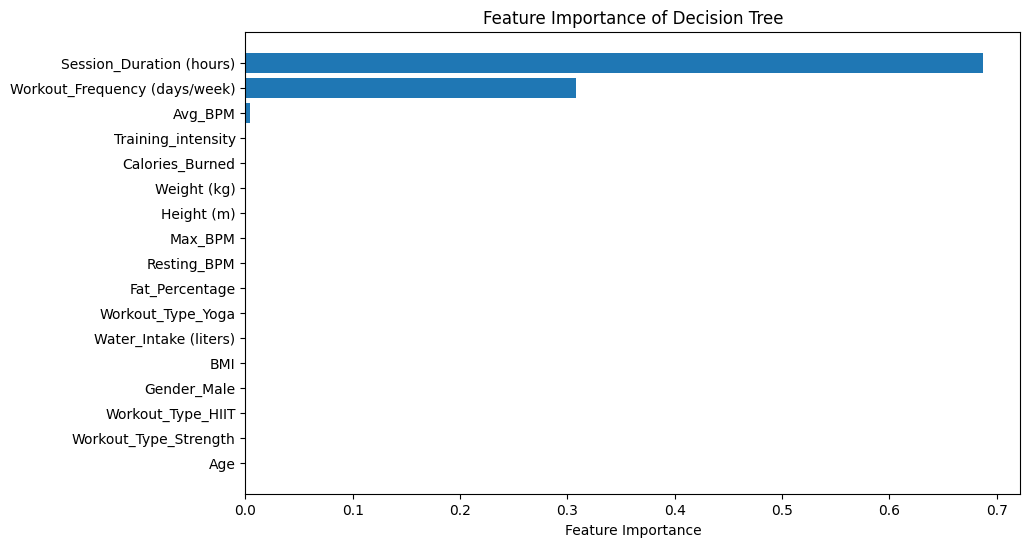

In [31]:
# Menampilkan feature importance dari decision tree
feature_importances = best_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Decision Tree')
plt.show()
